## MeanFlow 
Kaiming He and others have released a paper on flow based model where they are modeling average velocity instead of instantaneous velocity as we have seen in the previous flow implementation.

In [1]:
# Looad required libraries 

import torch 
import numpy as np
import torchvision
from tqdm import tqdm
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

## Foundations - Directional derivatives 
Paper speaks about Jacobian vector product, while I would like you to refer to some good resources on internet for what directional derivatives means because trust me they are easy to explain visually in a video than on a blog. I will still do my job here using a simple example, consider an example $f(x)=x^2y$

Now the partial derivate of this function basically gives

$$
\nabla f = \begin{bmatrix} \frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y} \end{bmatrix}
$$

$$
\nabla f = \begin{bmatrix} 2xy \\ x^2 \end{bmatrix}
$$

Now the gradient is like a vector field as shown below




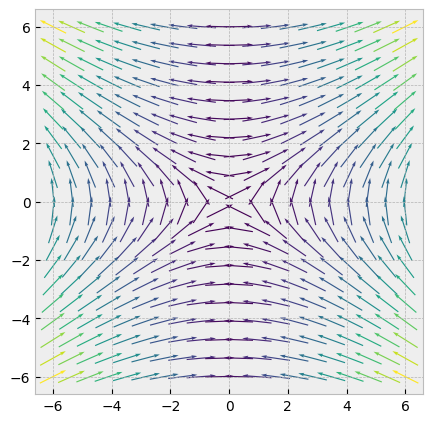

In [2]:
x = np.linspace(-6, 6, 20)
y = np.linspace(-6, 6, 20)
X, Y = np.meshgrid(x, y)

# Calculate vector components
# f(x, y) = [2xy, x^2]
U = 2*X*Y  # x-component: 2xy
V = X**2  # y-component: x^2
magnitude = np.sqrt(U**2 + V**2)

U_norm = U/magnitude
V_norm = V/magnitude

# Create the plot
plt.figure(figsize=(5, 5))

# Plot the vector field with color based on magnitude
plt.quiver(X, Y, U_norm, V_norm, magnitude, cmap='viridis', 
           pivot='mid', angles='xy', scale_units='xy', scale=1)
plt.show()

## We will use CIFAR10 this time

In [4]:
# Now say we have MNIST data in the shape of (N, 1, 28, 28)
# we will create a VAE model to generate new images similar to the training data. 

# Load MNIST data 

# Load MNIST data and resize it to 64x64
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.CIFAR10('data/', train=True, download=True,
                                transform=torchvision.transforms.Compose([
                                    torchvision.transforms.ToTensor(),
                                    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                ])),
    batch_size=64, shuffle=True)

val_loader = torch.utils.data.DataLoader(
    torchvision.datasets.CIFAR10('data/', train=False, download=True,
                                transform=torchvision.transforms.Compose([
                                    torchvision.transforms.ToTensor(),
                                    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                ])),
    batch_size=64, shuffle=False)

len(train_loader), len(val_loader)

  3%|▎         | 5.60M/170M [00:00<00:02, 56.0MB/s]

100%|██████████| 170M/170M [00:01<00:00, 106MB/s]  


(782, 157)

In [5]:
imgs, labels = next(iter(train_loader))
imgs.shape, labels.shape

(torch.Size([64, 3, 32, 32]), torch.Size([64]))

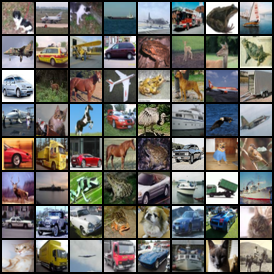

In [6]:
torchvision.transforms.ToPILImage()(torchvision.utils.make_grid(imgs, nrow=8, normalize=True))